In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
census_income = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
census_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Preprocessing 
Searching for Duplicates and it's removal

In [3]:
#Finding all duplicates in the Census Income Dataset 
duplicates = census_income.duplicated()
census_income[duplicates]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [4]:
print('Shape before dropping duplicates: ',census_income.shape)
census_income1 = census_income.drop_duplicates()
print('Shape after dropping duplicates: ',census_income1.shape)

#Duplicates Dropped number of Rows
dropped_rows = census_income.shape[0] - census_income1.shape[0]
print('Number of rows dropped: ', dropped_rows)

census_income = census_income1

Shape before dropping duplicates:  (32561, 15)
Shape after dropping duplicates:  (32537, 15)
Number of rows dropped:  24


#### Replacing Missing Values that are '?', Replacement of the '?' values with NaN

In [5]:
census_income.isin([' ?', '?', '? ']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [6]:
import math
census_income = census_income.replace([' ?', '?', '? '], np.nan)

total_na = census_income.isnull().sum().sum()
total_cells = np.product(census_income.size)
percentage_missing = total_na/total_cells*100

print('Total number of missing values in the dataset: ', total_na)
print('Percentage of missing values in the dataset: ', math.ceil(percentage_missing),'%') 

Total number of missing values in the dataset:  4261
Percentage of missing values in the dataset:  1 %


In [7]:
census_income.head()
df = census_income

#### Filling NaN values with their Mode for each Column

In [8]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native.country'] = df['native.country'].fillna(df['native.country'].mode()[0])
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### EDA/Plots

Text(0, 0.5, 'Count')

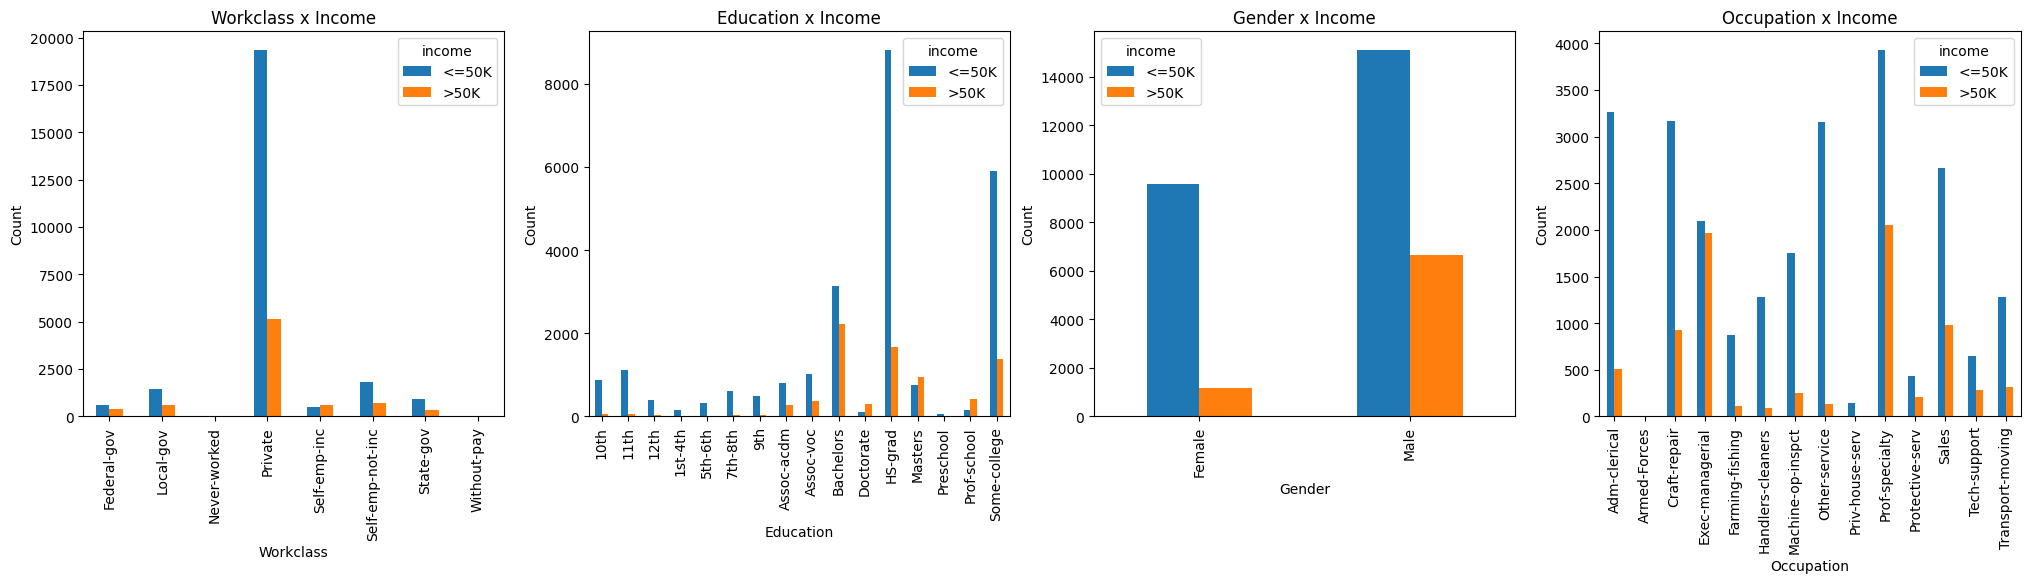

In [9]:
# plotting Workclass, education, gender vs income 

fig, axes = plt.subplots(1, 4, figsize=(25,5))

workclass_x_income = pd.crosstab(df['workclass'],df['income'],).plot(kind='bar',ax=axes[0])
axes[0].set_title('Workclass x Income')
axes[0].set_xlabel('Workclass')
axes[0].set_ylabel('Count')

education_x_income = pd.crosstab(df['education'], df['income']).plot(kind='bar',ax=axes[1])
axes[1].set_title('Education x Income')
axes[1].set_xlabel('Education')
axes[1].set_ylabel('Count')

gender_x_income = pd.crosstab(df['sex'], df['income']).plot(kind='bar', ax=axes[2])
axes[2].set_title('Gender x Income')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Count')


occupation_x_income = pd.crosstab(df['occupation'],df['income'],).plot(kind='bar', ax= axes[3])
axes[3].set_title('Occupation x Income')
axes[3].set_xlabel('Occupation')
axes[3].set_ylabel('Count')


In [10]:
occupation_labels = df['occupation']
occupation_labels = list(set(occupation_labels))
print(occupation_labels)

['Handlers-cleaners', 'Exec-managerial', 'Tech-support', 'Protective-serv', 'Prof-specialty', 'Machine-op-inspct', 'Transport-moving', 'Craft-repair', 'Sales', 'Adm-clerical', 'Farming-fishing', 'Other-service', 'Armed-Forces', 'Priv-house-serv']


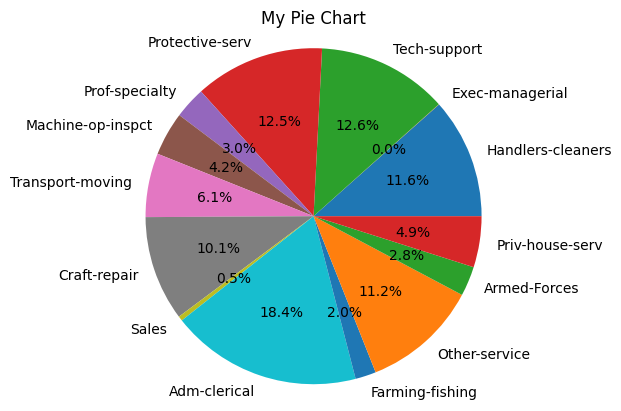

In [11]:
# Pie Chart of the Occupation of people 
#syntax from chatgpt and matplotlib

plt.pie(df.groupby('occupation').size(), labels=occupation_labels, autopct='%1.1f%%')
plt.title('My Pie Chart')  # Optional: Set a title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()



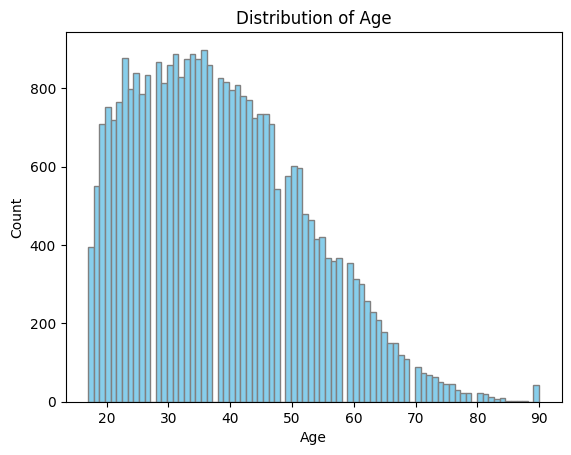

In [12]:
ages = df['age']

plt.hist(ages, bins=80, histtype = 'bar', color='skyblue', edgecolor = 'grey')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# from scipy.stats import gaussian_kde  # Import the gaussian_kde function
# kde = np.linspace(ages.min(), ages.max(), 100)
# kde_curve = gaussian_kde(ages)
# plt.plot(kde, kde_curve(kde), color='orange', label='Kernel Density Estimate')
# plt.show()




/tmp/ipykernel_20/575611014.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins = 90, color = 'mediumslateblue')


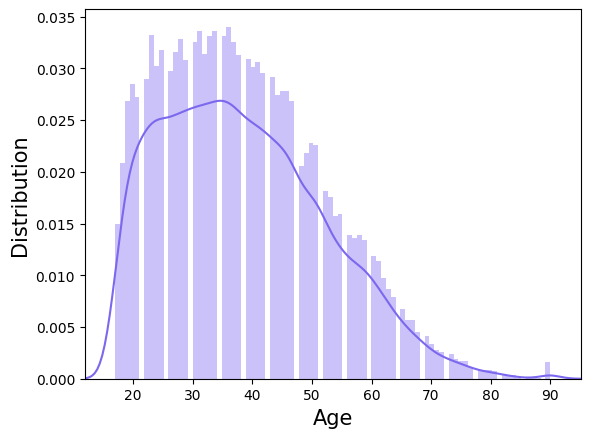

In [13]:
# This distribution plot shows the distribution of Age of people across the Data Set

sns.distplot(df['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

#### Feature Handling and Scaling 
1. Income map to assign <=50k as 0 and >50k as 1
2. Assigning Education with the values of Education.num and dropping Education.num
3. Lists for Numerical and Categorical columns 
4. Lable Encoding for the Categorical columns 

In [14]:
# Feature Scaling/Handling 

income_map = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].map(income_map)

In [15]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [16]:
df['education'] = df['education.num']
df = df.drop(columns = ['education.num'])
df = df.drop(columns = ['fnlwgt'])

In [17]:
df.head(10)

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,1


In [18]:
df['marital.status'].value_counts()

marital.status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [19]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
numerical = df.select_dtypes(include=['int64']).columns.tolist()
print(categorical)
print(numerical)

['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
['age', 'education', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [21]:
for column in categorical:
    df[column] = label_encoder.fit_transform(df[column])

df.head(10)

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,10,5,9,3,4,0,0,3900,40,38,0
5,34,3,9,0,7,4,4,0,0,3770,45,38,0
6,38,3,6,5,0,4,4,1,0,3770,40,38,0
7,74,6,16,4,9,2,4,0,0,3683,20,38,1
8,68,0,9,0,9,1,4,0,0,3683,40,38,0
9,41,3,10,4,2,4,4,1,0,3004,60,38,1


### Model Training
1. Importing needed libraries and DT Classifier 
2. Splitting Dataset into Train/Test
3. Training Model
4. Evakluation Metrics

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [23]:
y = df['income']
X = df.drop('income',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [24]:
features = list(df.columns[:-1])
features

['age',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country']

In [25]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [26]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [27]:
predictions = clf.predict(X_test)

In [28]:
new =[]
for i in range(0,100):
    new.append(predictions[i])
print(new)

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8190944478590453

In [30]:
clf.predict_proba(X_test[:10])

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
y_pred = predictions

y_true = y_test
y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: {:.3f}".format(accuracy))


precision = precision_score(y_true, y_pred)
print("Precision: {:.3f}".format(precision))


recall = recall_score(y_true, y_pred)
print("Recall: {:.3f}".format(recall))

f1 = f1_score(y_true, y_pred)
print("F1-score: {:.3f}".format(f1))

confusion = confusion_matrix(y_true, y_pred)
print('Confusion')
print(confusion)

Accuracy: 0.819
Precision: 0.628
Recall: 0.611
F1-score: 0.619
Confusion
[[6560  850]
 [ 916 1436]]


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
y_pred = predictions

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)
#report = classification_report(y_test, y_pred, target_names=X.target_names)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(confusion)
#print("\nClassification Report:")
#print(report)

Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-Score: 0.82

Confusion Matrix:
[[6560  850]
 [ 916 1436]]
